In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv(r'C:\Users\Lenovo\Desktop\titanic_analysis\data\Titanic_Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
###Number of rows and columns
df.shape
###Column names & data types
df.info()
###Summary statistics for numerical columns
df.describe()
###Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
###First 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
###Last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


QUESTIONS:

1) How many of the passengers survived?

2) How did gender affect survival rates?

3) Did passenger class and survival have a connection?

4) How did passengers' ages impact their chances of surviving?

5) How old were survivors on average compared to non-survivors?

In [35]:
# 1. Check missing values again
df.isnull().sum()

# 2. Handle 'Age' missing values — fill with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 4. Drop 'Cabin' column — too many missing values, not useful for now
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# 5. Verify missing values are fixed
df.isnull().sum()

# 6. Final check for data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Survivors: 342
Non-Survivors: 549


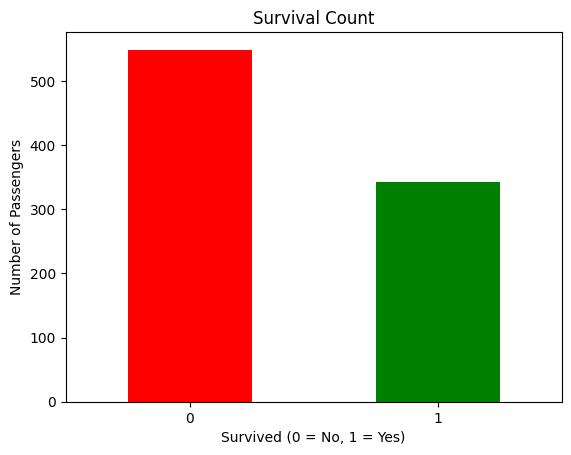

In [36]:
### 1) How many of the passengers survived?
# Count survivors and non-survivors
survival_counts = df['Survived'].value_counts()

print("Survivors:", survival_counts[1])
print("Non-Survivors:", survival_counts[0])

# Bar chart
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


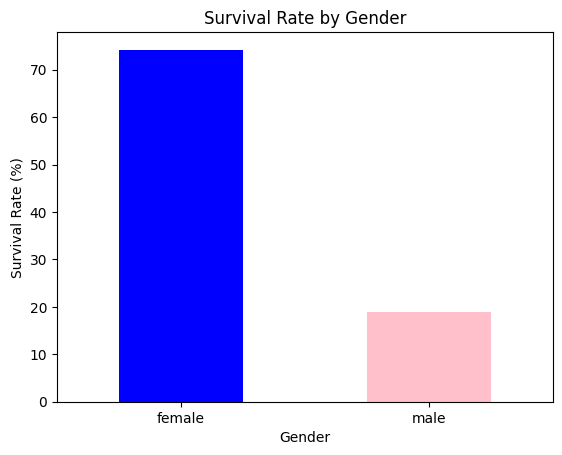

In [37]:
### 2) How did gender affect survival rates?
# Group by gender and survival rate
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print(gender_survival)

# Bar chart
gender_survival.plot(kind='bar', color=['blue', 'pink'])
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.show()

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


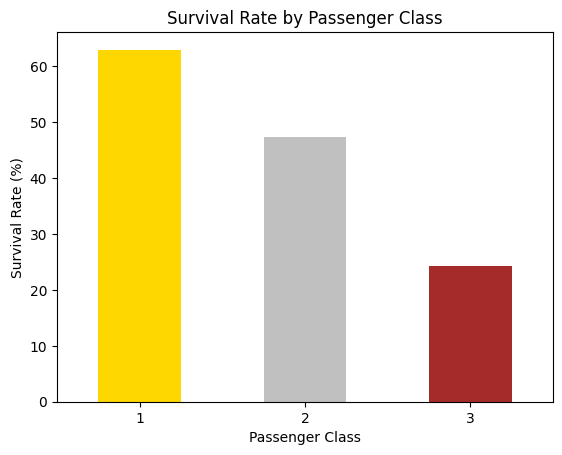

In [38]:
### 3) Did passenger class and survival have a connection?
# Group by Pclass and survival rate
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print(class_survival)

# Bar chart
class_survival.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.show()

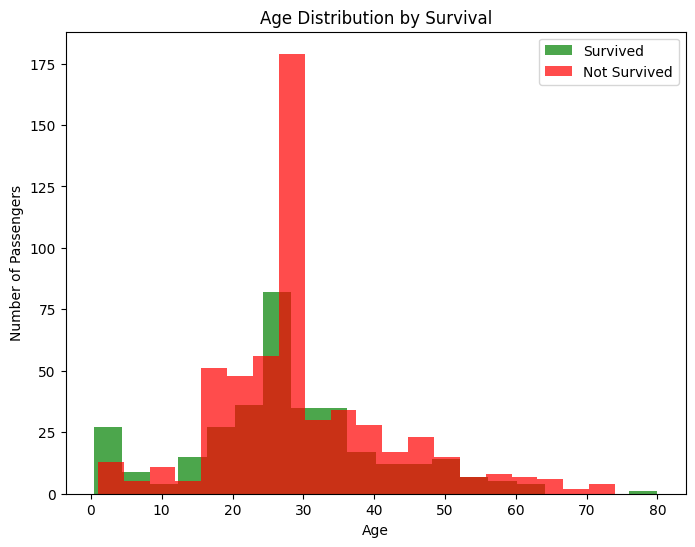

In [39]:
### 4) How did passengers' ages impact their chances of surviving?
plt.figure(figsize=(8,6))
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, alpha=0.7, label='Survived', color='green')
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, alpha=0.7, label='Not Survived', color='red')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

Average age of Non-survivors: 30.028233151183972
Average age of Survivors: 28.29143274853801


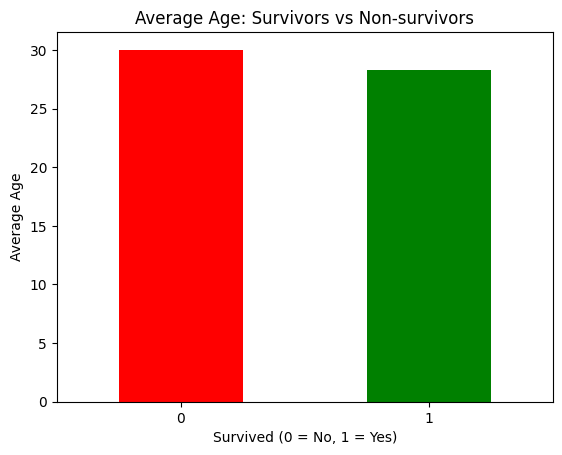

In [40]:
### 5) How old were survivors on average compared to non-survivors?
avg_age = df.groupby('Survived')['Age'].mean()
print("Average age of Non-survivors:", avg_age[0])
print("Average age of Survivors:", avg_age[1])

# Bar chart
avg_age.plot(kind='bar', color=['red', 'green'])
plt.title("Average Age: Survivors vs Non-survivors")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Average Age")
plt.xticks(rotation=0)
plt.show()

**Titanic Data Analysis**

**Introduction**

The loss of the RMS Titanic is one of the most well-known shipwrecks in history. The Titanic sank on her maiden voyage on 15 April 1912 with the loss of 1502 of the 2224 passengers and crew.

The minimal project is mostly to give you a taste of what this dataset looks like, and to answer some more specific questions about survival patterns in the passengersafter having done some basic data cleaning using Python libraries such as Pandas, Numpy and Matplotlib.

Datasource : Kaggle Titanic Dataset ( 891 passengers)

**Questions Investigated:**
1. How many of the passengers survived?
2. How did gender affect survival rates?
3. Did passenger class and survival have a connection?
4. How did passengers' ages impact their chances of surviving?
5. How old were survivors on average compared to non-survivors?

**Data Cleaning**

-Filling missing Age values with median.

-Imputed missing Embarked values with the most common port.

-Dropped CABIN column due to lot of missing values (>75%)

-We cleaned up the data and removed duplicates.

-deleted all the missing values for analysis.

### Q1:How many of the passengers survived?
->**342** of the **891** passengers survived, while **549** did not. This indicates that only roughly **38%** of the passengers made it out alive.

### Q2: How did gender affect survival rates?
Female survival rate: **74%**  
Male survival rate: **19%**  

->With women having a significantly higher chance of surviving, this demonstrates the significant influence of gender, perhaps as a result of the "women and children first" evacuation policy.

### Q3: Did passenger class and survival have a connection?
First Class: approximately 63% of survivors  
Second Class: approximately 47% of survivors  
Third Class: approximately 24% of survivors  

->Compared to those in lower classes, first-class passengers had a much higher chance of surviving.

### Q4: How did passengers' ages impact their chances of surviving?
->Younger passengers, particularly those under ten, had a higher overall survival rate. For the majority of adult age groups, survival rates did not differ significantly.

### Q5: How old were survivors on average compared to non-survivors?
Non-survivors: approximately 30.6 years  
Survivors: approximately 28.3 years  

->The average age of survivors was slightly younger, but the difference is negligible.

**Conclusion:**

An analysis across survival aboard the Titanic with respect to gender and passenger class. And while male, third-class passengers were overwhelmingly the most likely to die, women and first-class passengers had a vastly disproportionate rate of survival. Children had higher survival rates, but age ended up not being an indicator of anything relevant overall.

**Key Takeaways:**

-Women:74% survived / Men:just 19 % of survival

-First class: 63% out of first-class passenger survived compared to 24% in third class

-below 10 year old children had substantially higher odds of surviving

These are consistent with historical reports of the Titanic catastrophe and illustrate its socio-economic dimension, demonstrating survival rates that favoured some categories over others.